## [Link](https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift)

In [1]:
import numpy as np
from numba import jit

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

In [3]:
@jit()
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [23]:
def mandelbrot_image(xmin=-2.0, xmax=0.5, ymin=-1.25, ymax=1.25, width=10, height=10,\
                     maxiter=80, cmap=None, gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  

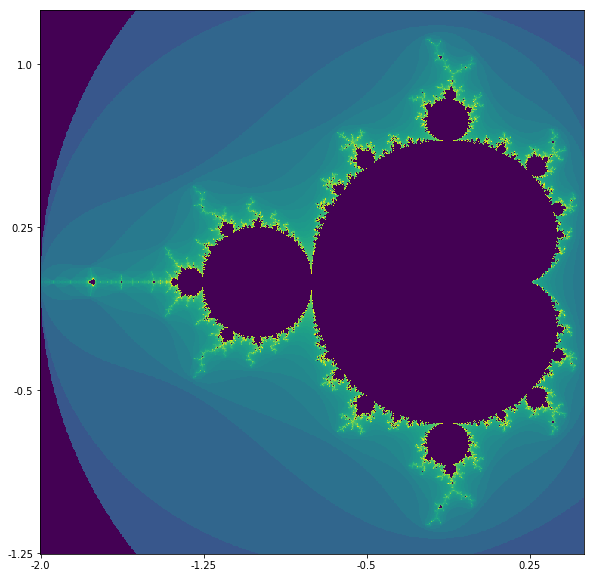

In [24]:
mandelbrot_image()

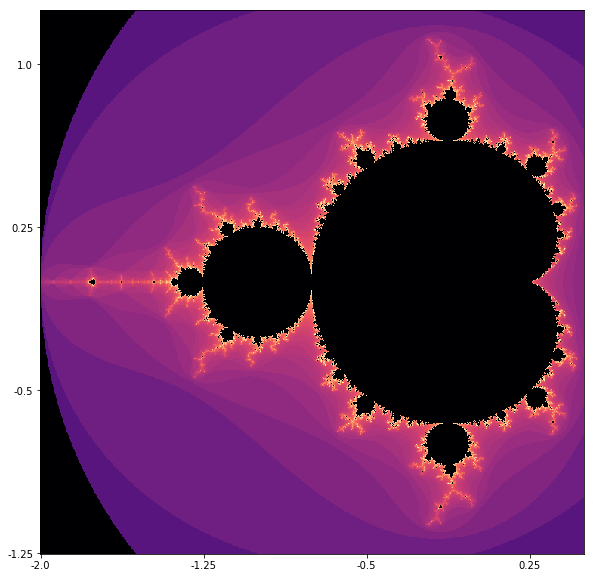

In [34]:
mandelbrot_image(cmap='magma')

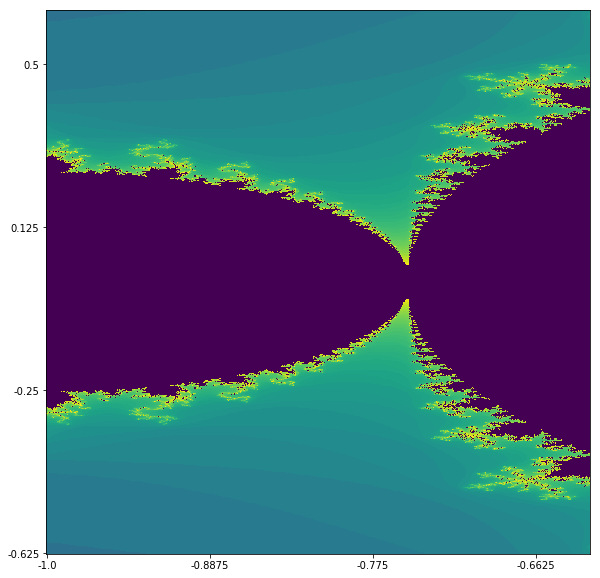

In [38]:
mandelbrot_image(xmin=-1.0, xmax=-0.625, ymin=-0.625, ymax=0.625, width=10, height=10,\
                     maxiter=80, cmap=None, gamma=0.3)

In [39]:
0.625*2

1.25

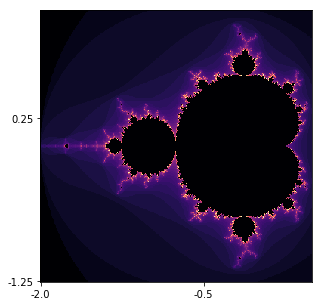

In [33]:
mandelbrot_image(width=5, height=5, cmap='magma', gamma=0.7)

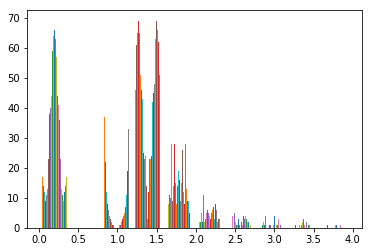

In [13]:
z3 = z ** 0.3
plt.hist(z3)
plt.show()